# 1. 파이썬에서의 파일 및 데이터 처리
## 1-1. 파일열기 : open 함수
* file=open(파일 이름, 모드)
  - 사용 후에는 close 함수로 닫아야 함
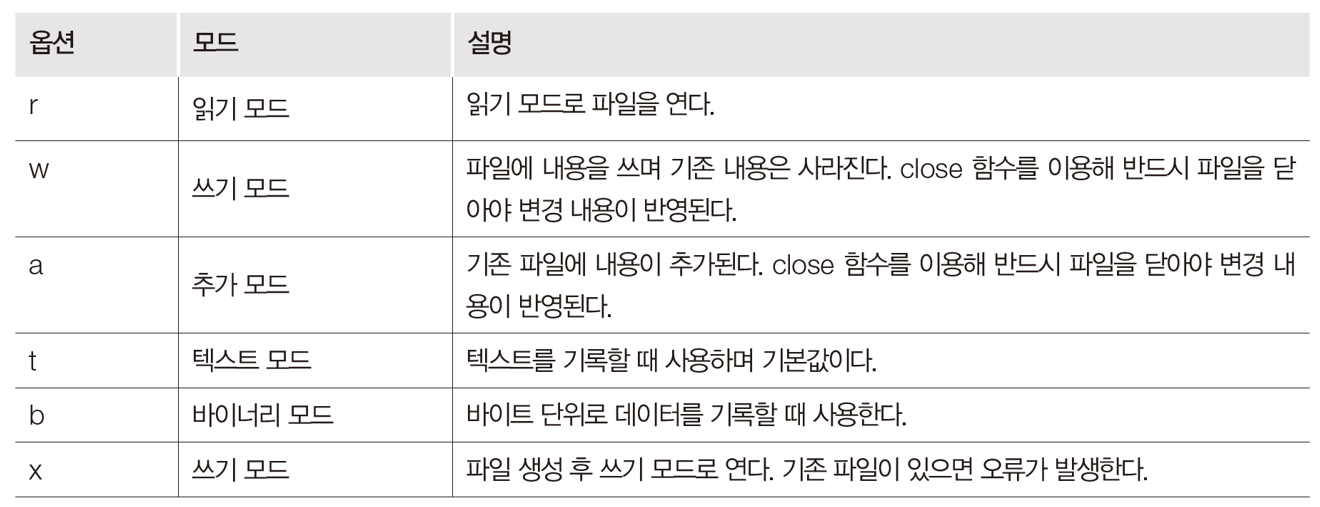

In [ ]:
f = open('file.txt', 'rt', encoding='UTF8')
for line in f : 
    print(line, end='')
f.close()

* 자동으로 파일 열고 닫기: with 문
  - open 함수에 with를 사용하면 파일 열고 닫기가 자동으로 처리됨
  - **with open**(*파일이름*, *모드*) **as** *변수명*:  
          처리문 블록

In [1]:
with open('proverb.txt', 'rt', encoding='UTF8', newline="") as fr : 
    for line in fr : 
        print(line.strip())

작은 일에 성실한 사람은 큰 일에도 성실하고,
작은 일에 정직하지 못한 사람은 큰 일에도 정직하지 못하다.
누가복음 16:10

변함없이 서로 사랑하는 이가 친구이며
위급할 때 서로 돕는 이가 형제이다.
잠언 17:17


## 1-2. 문자열 공백/문자 제거: strip, lstrip, rstrip 함수
* strip(*string*) : 문자열 양쪽에 있는 공백 제거
* lstrip(*string*)  : 문자열 기준으로 왼쪽 공백이나 지정된 문자 제거
* rstrip(*string*)  : 문자열 기준으로 오른쪽 공백이나 지정된 문자 제거

In [ ]:
# 양쪽 공백 없애기
b1="    작은 일에 성실한 사람은      큰일에도 성실하고    "
print(b1.strip())

In [ ]:
# 한쪽 ... 없애기
text="....작은 일에 성실한 사람은, 큰일에도 성실하고...."
print(text.lstrip('.'))

## 1-3. 문자열 분리: split 함수
* 지정된 문자 기준으로 분리하여 List로 return

In [ ]:
text="....작은 일에 성실한 사람은, 큰일에도 성실하고...."
data = [line.strip() for line in text.lstrip('.').split(',')]
print(data)

In [ ]:
numbers="1. 2. 3. 4. 5. 6"
data = numbers.split('. ')
print(data)

# 2. Pandas에서의 파일 처리
* Pandas에서 사용할 수 있는 파일 종류
  - CSV(Comma Seperated Value) 파일
  - 엑셀 파일
  
* 파일 읽기 함수
  - CSV 파일 : *dataframe* = *pandas*.**read_csv**(*파일명*, sep=*seperator*)
  - 엑셀 파일 : *dataframe* = *pandas*.**read_excel**(*파일명*, sheet_name=*sheet_name*)
  
* 파일 저장 함수
  - CSV 파일 : *dataframe*.**to_csv**(*파일명*, sep=*seperator*)
  - 엑셀 파일 : *dataframe*.**to_excel**(*파일명*)

  
## 2-1. 웹 페이지의 CSV 파일을 DataFrame으로 로딩

* read_CSV의 파일명 대신 URL 사용
* 실습 데이터 : 타이타닉 데이터 파일 (웹페이지)
  - url = https://raw.githubusercontent.com/sehakflower/data/main/titanic.csv


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/sehakflower/data/main/titanic.csv'
dataframe = pd.read_csv(url, sep='\t')
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S


* 탭을 기준으로 분리하기

In [ ]:
print('apple', 'banana')
print('apple', 'banana', sep='')
print('apple', 'banana', sep=' ')
print('apple', 'banana', sep=' ')
print('apple', 'banana', sep=' -> -> ')
print('apple', 'banana','eggs', 'ham')
print('apple', 'banana', 'eggs', 'ham', sep='\t')
print('apple', 'banana','eggs', 'ham', sep='\t\t')

## 2-2. 엑셀 파일 가져오기

* 실습 데이터 : 타이타닉 데이터 파일 (웹페이지)
  - url = https://github.com/sehakflower/data/blob/main/titanic.xlsx?raw=true
  - sheet_name = 'titanic3'

In [26]:
url2 = 'https://github.com/sehakflower/data/blob/main/titanic.xlsx?raw=true'
t_dataframe = pd.read_excel(url2, sheet_name = 'titanic3')
t_dataframe

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# 3. Pandas 데이터 확인 및 처리
## 3-1. 데이터 살펴보기

### 3-1-1. 앞뒤 데이터 보기: head, tail
  * *dataframe*.**head**(*num_row*) : *num_row* = 5
  * *dataframe*.**tail**(*num_row*) : *num_row* = 5

In [27]:
url = 'https://raw.githubusercontent.com/sehakflower/data/main/titanic.csv'
tin_data = pd.read_csv(url, sep='\t')
tin_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.3750,NaN,S
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
149,150,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.0000,NaN,S
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


### 3-1-2. 데이터 개수/형태 확인하기: len/shape
* **len**(*데이터이름*) : 데이터 개수
* *tuple* = *dataframe*.**shape** : (row 수, column 수)

In [28]:
len(tin_data)

156

### 3-1-3. index와 데이터 값 보기 : index, values
* *dataframe*.**index**
* *dataframe*.**values**

In [29]:
tin_data.index

RangeIndex(start=0, stop=156, step=1)

In [30]:
tin_data.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [154, 0, 3, ..., 14.5, nan, 'S'],
       [155, 0, 3, ..., 7.3125, nan, 'S'],
       [156, 0, 1, ..., 61.3792, nan, 'C']], dtype=object)

### 3-1-4. 데이터의 기본 통계치 보기: describe
* *dataframe*.**describe**()
  - 데이터형이 float나 int인 열에만 적용
  - 각 열의 개수(count), 평균(mean), 표준편차(std), 최솟값(min), 최댓값(max) 등의 통계치 확인 가능

In [31]:
tin_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


### 3-1-5. 결측치와 데이터형 확인하기: info 함수
* *dataframe*.**info**()
  - 결측치 : null값(NaN)인 데이터

In [32]:
tin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  156 non-null    int64  
 1   Survived     156 non-null    int64  
 2   Pclass       156 non-null    int64  
 3   Name         156 non-null    object 
 4   Sex          156 non-null    object 
 5   Age          126 non-null    float64
 6   SibSp        156 non-null    int64  
 7   Parch        156 non-null    int64  
 8   Ticket       156 non-null    object 
 9   Fare         156 non-null    float64
 10  Cabin        31 non-null     object 
 11  Embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


## 3-2. 열/행 정리하기
### 3-2-1. 열 이름 변경하기 : *dataframe*.columns
* 열 이름을 모두 소문자로 변경하여 이후 처리를 쉽게하기

In [33]:
# tin_data의 columns 확인
tin_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
# 해당 column name을 모두 소문자 변경하기
names = [name.lower() for name in tin_data.columns]
names

['passengerid',
 'survived',
 'pclass',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked']

In [35]:
# tin_data의 column_name으로 지정하기
tin_data.columns = names

In [36]:
# 전체 dataframe 확인하기
tin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  156 non-null    int64  
 1   survived     156 non-null    int64  
 2   pclass       156 non-null    int64  
 3   name         156 non-null    object 
 4   sex          156 non-null    object 
 5   age          126 non-null    float64
 6   sibsp        156 non-null    int64  
 7   parch        156 non-null    int64  
 8   ticket       156 non-null    object 
 9   fare         156 non-null    float64
 10  cabin        31 non-null     object 
 11  embarked     155 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 14.8+ KB


### DataFrame 백업해놓기 : *dataframe*.copy()

In [38]:
temp_data = tin_data.copy()
temp_data

### 3-2-2. 행 추가하기
* *new_dataframe* = *dataframe*.**append**(new_row, ignore_index=True)
  - deprecate and will be removed

In [42]:
new_row = {'passengerId':1, 'survived':1, 'pclass':1,
'name':1, 'sex':1, 'age':1, 'sibsp':1, 'parch':1, 'ticket':1, 'fare':1, 'cabin':1,
'embarked':1}
temp_data = tin_data.append(new_row, ignore_index=True)
temp_data

C:\Users\User\AppData\Local\Temp\ipykernel_4268\1879962655.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_data = tin_data.append(new_row, ignore_index=True)


,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,passengerId
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S,NaN
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,NaN
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S,NaN
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153.0,0.0,3.0,"Meo, Mr. Alfonzo",male,55.5,0.0,0.0,A.5. 11206,8.0500,NaN,S,NaN
153,154.0,0.0,3.0,"van Billiard, Mr. Austin Blyler",male,40.5,0.0,2.0,A/5. 851,14.5000,NaN,S,NaN
154,155.0,0.0,3.0,"Olsen, Mr. Ole Martin",male,NaN,0.0,0.0,Fa 265302,7.3125,NaN,S,NaN
155,156.0,0.0,1.0,"Williams, Mr. Charles Duane",male,51.0,0.0,1.0,PC 17597,61.3792,NaN,C,NaN


* *new_dataframe* = pandas.**concat**([dataframe1, dataframe2], ignore_index=True)

In [46]:
# 일단 new row로 dataframe을 만들고 인덱스는 일단 암거나 1로 지정
new_row = {'passengerId':1, 'survived':1, 'pclass':1,
'name':1, 'sex':1, 'age':1, 'sibsp':1, 'parch':1, 'ticket':1, 'fare':1, 'cabin':1,
'embarked':1}
new_df = pd.DataFrame(new_row, index=[3])
new_df

,passengerId,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,1,1,1,1,1,1,1,1,1,1,1,1


In [49]:
new_df2 = pd.concat([tin_data, new_df], ignore_index=True)
new_df2

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,passengerId
0,1.0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2.0,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,NaN
2,3.0,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4.0,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,NaN
4,5.0,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,153.0,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,NaN
153,154.0,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,NaN
154,155.0,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,NaN
155,156.0,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,NaN


### 3-2-3. 열 추가하기
* 'gender'라는 열 추가 (기본값 = 1)
* 'sex'열을 확인하여 'gender'열의 값 수정 -> 검색 및 loc 활용

In [54]:
# 시리즈를 추가하면 됨... 오후부터 하겠음!!!
temp_data = tin_data.copy()
temp_data['gender']=1

#좌표로 바로 확인하려면? .shape
tin_data.shape, temp_data.shape

((156, 12), (156, 13))

In [55]:
# loc 배우고 다시 하기!

## 3-3. 데이터 정렬하기
### 3-3-1. 인덱스 기준으로 정렬하기 : sort_index
* *dataframe*.**sort_index(ascending=*True/False*)**

In [59]:
temp_data.sort_index(ascending=False)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,gender
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C,1
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,1
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,1
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,1
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1


### 3-3-2. 열 기준으로 정렬하기 : sort_values
* *dataframe*.**sort_values**(by=*column_name* or *column_list*, ascending=*True/False*)

In [71]:
# 요금이. 높은 순부터. 상위데이터만.
temp_data.sort_values(by='fare', ascending=False).head()

temp_data.sort_values(by=['fare', 'pclass'])

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,gender
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q,1
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S,1
131,132,0,3,"Coelho, Mr. Domingos Fernandeo",male,20.0,0,0,SOTON/O.Q. 3101307,7.0500,NaN,S,1
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,0,1,"Harris, Mr. Henry Birkhardt",male,45.0,1,0,36973,83.4750,C83,S,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,1
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,1


## 3-4. 데이터 가져오기
### 3-4-1. 지정 범위의 행에서 데이터 가져오기
* *dataframe*[*start*:*end+1*:*step*] : start번째 행부터 end번째 행 추출, step마다 추출
  - *start* = 0, *end* = length, *step* = 1
  - *dataframe*[::-1] : 행의 순서를 거꾸로 변경
  - 범위가 아닌 single index는 오류 발생

In [74]:
# 3번 행만 보고 싶다면?
tin_data[3:4]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S


* Error 발생 유형

### 3-4-2. 지정 범위의 열에서 데이터 가져오기
* *series* = *dataframe* **[** *dataframe*.**columns[***column_no***]]**
  - 마지막 열 데이터는 -1로 표현

* [실습]
  - 첫 번째(0번) 열을 1차원 배열의 Series 객체로 추출
  - 마지막 열을 1차원 배열의 Series 객체로 추출

In [75]:
# 컬럼이 몇 개?
len(tin_data.columns)

12

In [82]:
# 첫번째 컬럼만 보고 싶어!
tin_data[tin_data.columns[-1]]

0      S
1      C
2      S
3      S
4      S
      ..
151    S
152    S
153    S
154    S
155    C
Name: embarked, Length: 156, dtype: object

### 3-4-3. 열 이름으로 데이터 가져오기
* *series* = *dataframe* **[** *column_name* **]**
* *dataframe* **.** *column_name*

In [88]:
tin_data['age']

tin_data.age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
151    22.0
152    55.5
153    40.5
154     NaN
155    51.0
Name: age, Length: 156, dtype: float64

### 3-4-4. 열 이름과 위치를 이용해 데이터 가져오기
* *dataframe* **[** *dataframe*.**columns [** *column_no* **]][** *start*:*end*:*step* or *single index* **]**
* *dataframe* **[** *column_name* **][** *start*:*end*:*step* or *single index* **]**

In [109]:
# 3번째 열의 4~8번째 값
tin_data[tin_data.columns[3]][4:9]

4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
Name: name, dtype: object

In [124]:
# age 열 마지막 행만 제외하고 출력
tin_data['age'][:-1]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
150    51.0
151    22.0
152    55.5
153    40.5
154     NaN
Name: age, Length: 155, dtype: float64

In [135]:
# age열의 마지막 행만 출력
tin_data['age'][-1:]
tin_data.tail(1)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
155,156,0,1,"Williams, Mr. Charles Duane",male,51.0,0,1,PC 17597,61.3792,NaN,C


### 3-4-5. 인덱스명을 기준으로 데이터 가져오기: loc 속성
* *dataframe*.**loc[** ... **]**
  - *single_index*
  - *start_index*:*end_index*:*step*
  - *list_of_indexes*

In [136]:
tin_data.loc[0]

passengerid                          1
survived                             0
pclass                               3
name           Braund, Mr. Owen Harris
sex                               male
age                               22.0
sibsp                                1
parch                                0
ticket                       A/5 21171
fare                              7.25
cabin                              NaN
embarked                             S
Name: 0, dtype: object

In [137]:
tin_data.loc[0:5]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [138]:
tin_data.loc[[0, 4, 7]]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.075,NaN,S


* *dataframe*.**loc**[*row*, *column*]
  - 둘 다 생략 시 DataFrame 전체

In [146]:
# 전체 dataframe
tin_data.loc[:]

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
151,22.0
152,55.5
153,40.5
154,NaN


In [147]:
# 전체 열 & 일부 컬럼
tin_data.loc[:,['age']]

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
151,22.0
152,55.5
153,40.5
154,NaN


In [150]:
# list도 가능
tin_data.loc[3:7,'pclass':'age']

,pclass,name,sex,age
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,3,"Allen, Mr. William Henry",male,35.0
5,3,"Moran, Mr. James",male,NaN
6,1,"McCarthy, Mr. Timothy J",male,54.0
7,3,"Palsson, Master. Gosta Leonard",male,2.0


### 3-4-6. 인덱스 순서를 기준으로 데이터 가져오기: iloc 속성

In [154]:
tin_data.iloc[3]

passengerid                                               4
survived                                                  1
pclass                                                    1
name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
sex                                                  female
age                                                    35.0
sibsp                                                     1
parch                                                     0
ticket                                               113803
fare                                                   53.1
cabin                                                  C123
embarked                                                  S
Name: 3, dtype: object

In [153]:
tin_data.loc[3]

passengerid                                               4
survived                                                  1
pclass                                                    1
name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
sex                                                  female
age                                                    35.0
sibsp                                                     1
parch                                                     0
ticket                                               113803
fare                                                   53.1
cabin                                                  C123
embarked                                                  S
Name: 3, dtype: object

### [Numpy 학습 후] 피벗 테이블을 이용해 데이터 가져오기

### 3-4-7. 그룹으로 묶어서 데이터 가져오기 : groupby
* 데이터를 그룹별로 분할하여 독립된 그룹에 대하여 별도로 데이터를 처기하거나   
  그룹별 통계량을 확인할 때 유용한 함수
  - count(), sum(), mean()
* *dataframe* = *dataframe*.**groupby**(*그룹화 기준*)
  - column_name
  - list of column_names

#### .groupby()의 동작원리 : sum() 적용시
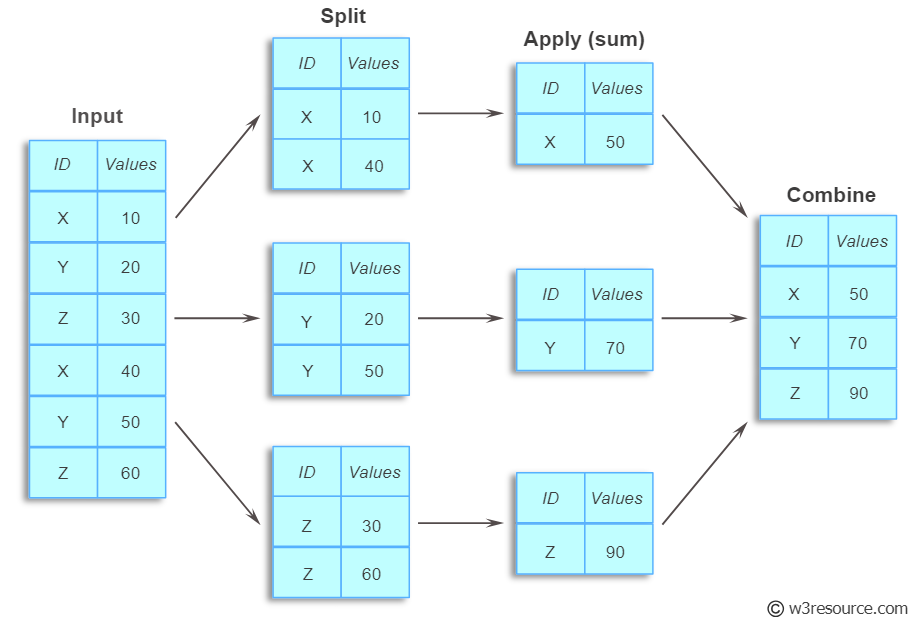

In [182]:
tin_data.groupby(['survived','sex'])['age'].mean()

survived  sex   
0         female    20.633333
          male      31.228571
1         female    26.265625
          male      23.314444
Name: age, dtype: float64

## 3-5. 조건 검색으로 데이터 추출
## 3-5-1. Boolean Index로 조건 검색하기
* *dataframe*[**boolean Index**]
* *dataframe*[**boolean Index**][*column*]
  - **boolean Index** : *dataframe*[*column_name*] 이용한 조건식

In [194]:
#나이가 3살이하. 나이와 이름.
tin_data[tin_data['age']<=3][['age','name']]

,age,name
7,2.00,"Palsson, Master. Gosta Leonard"
16,2.00,"Rice, Master. Eugene"
43,3.00,"Laroche, Miss. Simonne Marie Anne Andree"
78,0.83,"Caldwell, Master. Alden Gates"
119,2.00,"Andersson, Miss. Ellis Anna Maria"


### 3-5-2. loc 속성으로 조건 검색하기
* *dataframe*.loc[**boolean Index**]
* *dataframe*.loc[**boolean Index**][*column*]
* *dataframe*.loc[**boolean Index**, *column_range*]

In [198]:
tin_data.loc[tin_data['age']<=3, 'name']

7                Palsson, Master. Gosta Leonard
16                         Rice, Master. Eugene
43     Laroche, Miss. Simonne Marie Anne Andree
78                Caldwell, Master. Alden Gates
119           Andersson, Miss. Ellis Anna Maria
Name: name, dtype: object

In [199]:
# 과제?????
tin_data.loc[tin_data['sex'] == 'female', 'gender'] = 0
tin_data

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.6000,C2,S,0.0
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,NaN,S,1.0
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S,1.0
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S,1.0


### 3-5-3. isin 함수로 조건 검색하기
* 열에 어떤 데이터가 존재하는지 검색할 때 사용
* *True/False* = *dafaframe*[*column_name*].**isin**(*list*)

In [201]:
# 성별에 male 인지 boolean으로 반환
tin_data['sex'].isin(['male'])

0       True
1      False
2      False
3      False
4       True
       ...  
151    False
152     True
153     True
154     True
155     True
Name: sex, Length: 156, dtype: bool

In [209]:
tin_data['name'].isin(['Allen, Mr. William Henry'])

0      False
1      False
2      False
3      False
4       True
       ...  
151    False
152    False
153    False
154    False
155    False
Name: name, Length: 156, dtype: bool

### 3-5-4. isin 함수와 loc 속성으로 조건 검색하기
* isin을 만족하는 데이터 추출
* *dataframe*.**loc**[*dataframe*[*column_name*].**isin**(*condition_list*), *columns*]

In [216]:
#이름이 Allen, Mr. William Henry인 사람의 전체 데이터
condition = ['Allen, Mr. William Henry']
tin_data.loc[tin_data['name'].isin(condition)]

,age
4,35.0


In [217]:
# 나이만(로우 데이터형)
tin_data.loc[tin_data['name'].isin(condition), 'age']

4    35.0
Name: age, dtype: float64

In [ ]:
# 나이만(데이터 프레임형)
tin_data.loc[tin_data['name'].isin(condition), ['age']]

In [ ]:
     
    `